In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
path = 'einstein.png'
image = cv2.imread(path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [3]:
sobel1 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel2 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

gau_small = 1/16 * np.array([[1,2,1],[2,4,2],[1,2,1]])

gau_big = 1/256 * np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

In [4]:
def convolution (i,kernel):
    h = i.shape[0]
    l = i.shape[1]
    size = kernel.shape[0]
    result = np.zeros([h-size+1,l-size+1])
    
    out_h = result.shape[0]
    out_l = result.shape[1]
    for n in range(out_h):
        for m in range(out_l):
            ii = i[n:n+size,m:m+size]
            ii = ii.flatten()
            k = kernel.flatten()
            sum = 0
            for j in range(size**2):
                sum = sum + ii[j]*k[j]
            result[n,m] = sum
            
    return result

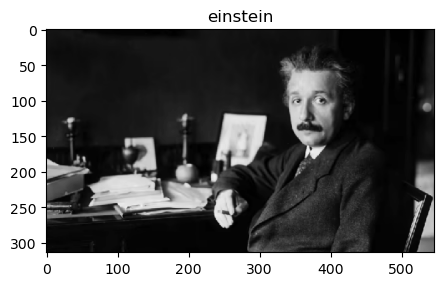

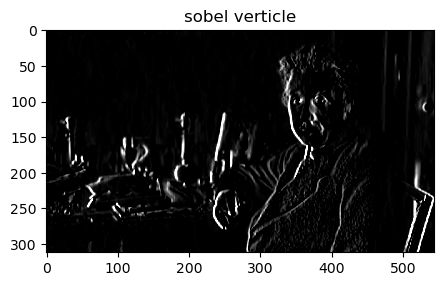

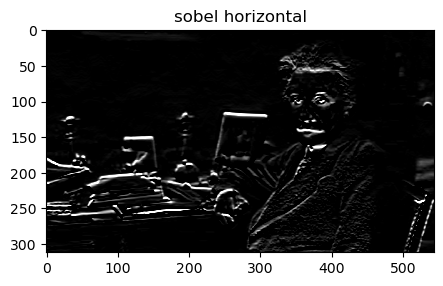

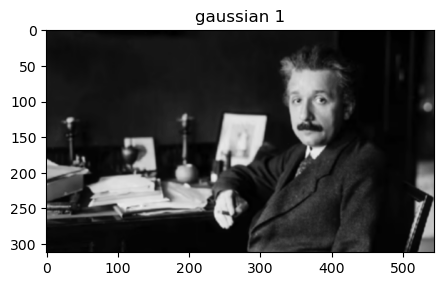

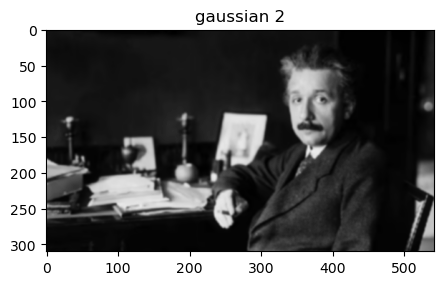

In [5]:
a = convolution(image,sobel1)
b = convolution(image,sobel2)
c = convolution(image,gau_small)
d = convolution(image,gau_big)

plt.figure(figsize=(5,5))
plt.title('einstein')
plt.imshow(image,cmap="gray",vmin = 0,vmax = 255)

plt.figure(figsize=(5,5))
plt.title('sobel verticle')
plt.imshow(a,cmap="gray",vmin = 0,vmax = 255)

plt.figure(figsize=(5,5))
plt.title('sobel horizontal')
plt.imshow(b,cmap="gray",vmin = 0,vmax = 255)

plt.figure(figsize=(5,5))
plt.title('gaussian 1')
plt.imshow(c,cmap="gray",vmin = 0,vmax = 255)

plt.figure(figsize=(5,5))
plt.title('gaussian 2')
plt.imshow(d,cmap="gray",vmin = 0,vmax = 255)

In [6]:
def conv1 (i,kernel,scale):
    h = i.shape[0]
    l = i.shape[1]
    k = np.zeros([1*scale,len(kernel)*scale])
    for x in range(len(kernel)*scale):
        if x < scale:
            k[:,x] = -1
        else:
            k[:,x] = 1 
    print(k)
    result = np.zeros([h-1*scale+1,l-2*scale+1]) 
    out_h = result.shape[0]
    out_l = result.shape[1]
    for n in range(out_h):
        for m in range(out_l):
            ii = i[n:n+1*scale,m:m+2*scale]
            ii = ii.flatten()
            sum = 0
            if scale > 1:
                k = k.flatten()
                for j in range(2*scale*scale):
                    sum = sum + ii[j]*k[j]
            else:
                for j in range(2*scale*scale):
                    sum = sum + ii[j]*k[0,j]
            result[n,m] = sum 
    return result

In [7]:
def conv2 (i,kernel,scale):
    h = i.shape[0]
    l = i.shape[1]
    k = np.zeros([len(kernel)*scale,1*scale])
    for x in range(len(kernel)*scale):
        if x < scale:
            k[x,:] = -1
        else:
            k[x,:] = 1  
    print(k)
    result = np.zeros([h-2*scale+1,l-1*scale+1]) 
    out_h = result.shape[0]
    out_l = result.shape[1]
    for n in range(out_h):
        for m in range(out_l):
            ii = i[n:n+2*scale,m:m+1*scale]
            ii = ii.flatten()
            sum = 0
            if scale > 1:
                k = k.flatten()
                for j in range(2*scale*scale):
                    sum = sum + ii[j]*k[j]
            else:
                for j in range(2*scale*scale):
                    sum = sum + ii[j]*k[0,j]
            result[n,m] = sum 
    return result

In [8]:
def conv3 (i,kernel,scale):
    h = i.shape[0]
    l = i.shape[1]
    k = np.zeros([1*scale,len(kernel)*scale])
    for x in range(len(kernel)*scale):
        if x < scale:
            k[:,x] = 1
        elif x > scale*2-1:
            k[:,x] = 1
        else:
            k[:,x] = -1 
    print(k)
    result = np.zeros([h-1*scale+1,l-3*scale+1]) 
    out_h = result.shape[0]
    out_l = result.shape[1]
    for n in range(out_h):
        for m in range(out_l):
            ii = i[n:n+1*scale,m:m+3*scale]
            ii = ii.flatten()
            sum = 0
            if scale > 1:
                k = k.flatten()
                for j in range(3*scale*scale):
                    sum = sum + ii[j]*k[j]
            else:
                for j in range(3*scale*scale):
                    sum = sum + ii[j]*k[0,j]
            result[n,m] = sum 
    return result

In [9]:
def conv4 (i,kernel,scale):
    h = i.shape[0]
    l = i.shape[1]
    k = np.zeros([len(kernel)*scale,1*scale])
    for x in range(len(kernel)*scale):
        if x < scale:
            k[x,:] = 1
        elif x > scale*2-1:
            k[x,:] = 1
        else:
            k[x,:] = -1 
    print(k)
    result = np.zeros([h-3*scale+1,l-1*scale+1]) 
    out_h = result.shape[0]
    out_l = result.shape[1]
    for n in range(out_h):
        for m in range(out_l):
            ii = i[n:n+3*scale,m:m+1*scale]
            ii = ii.flatten()
            sum = 0
            if scale > 1:
                k = k.flatten()
                for j in range(3*scale*scale):
                    sum = sum + ii[j]*k[j]
            else:
                for j in range(3*scale*scale):
                    sum = sum + ii[j]*k[j,0]
            result[n,m] = sum 
    return result

In [21]:
def conv5 (i,kernel,scale):
    h = i.shape[0]
    l = i.shape[1]
    k = np.zeros([2*scale,2*scale])
    for x in range(2*scale):
        for y in range(2*scale):
            if x<scale and y<scale:
                k[x,y] = -1
            elif x>scale-1 and y>scale-1:
                k[x,y] = -1
            else:
                k[x,y] = 1
    print(k)
    result = np.zeros([h-3*scale+1,l-1*scale+1]) 
    out_h = result.shape[0]
    out_l = result.shape[1]
    for n in range(out_h):
        for m in range(out_l):
            ii = i[n:n+3*scale,m:m+1*scale]
            ii = ii.flatten()
            sum = 0
            k = k.flatten()
            for j in range(2*scale*scale):
                sum = sum + ii[j]*k[j]
            result[n,m] = sum 
    return result

kernel size: 3
[[-1. -1. -1.  1.  1.  1.]
 [-1. -1. -1.  1.  1.  1.]
 [-1. -1. -1.  1.  1.  1.]]
[[-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
[[ 1.  1.  1. -1. -1. -1.  1.  1.  1.]
 [ 1.  1.  1. -1. -1. -1.  1.  1.  1.]
 [ 1.  1.  1. -1. -1. -1.  1.  1.  1.]]
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
[[-1. -1. -1.  1.  1.  1.]
 [-1. -1. -1.  1.  1.  1.]
 [-1. -1. -1.  1.  1.  1.]
 [ 1.  1.  1. -1. -1. -1.]
 [ 1.  1.  1. -1. -1. -1.]
 [ 1.  1.  1. -1. -1. -1.]]


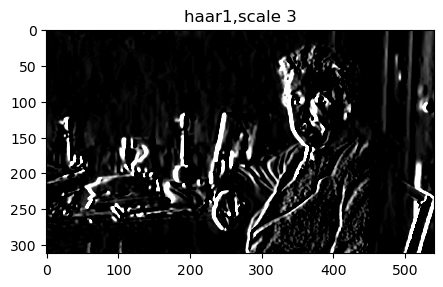

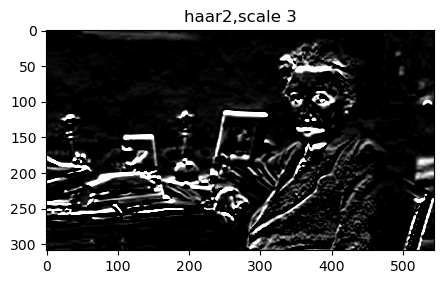

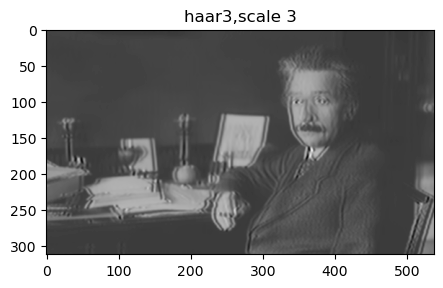

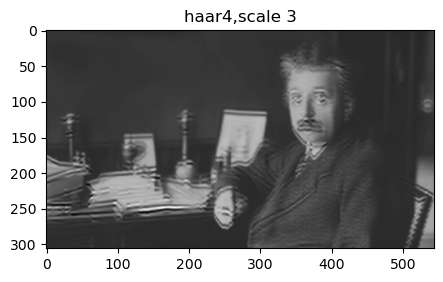

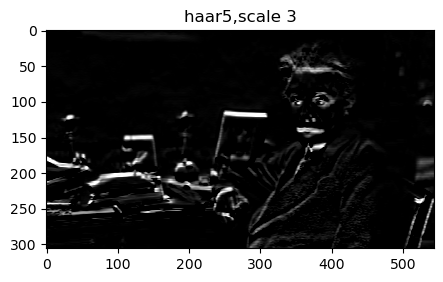

In [25]:
size = input("kernel size: ")
size = int(size)
haar1 = [-1,1]
haar2 = [[-1],[1]]
haar3 = [1,-1,1]
haar4 = [[1],[-1],[1]]
haar5 = [[-1,1],[1,-1]]

ss = conv1(image,haar1,size)
plt.figure(figsize=(5,5))
plt.title('haar1,scale %d'%size)
plt.imshow(ss,cmap="gray",vmin = 0,vmax = 255)

qq = conv2(image,haar2,size)
plt.figure(figsize=(5,5))
plt.title('haar2,scale %d'%size)
plt.imshow(qq,cmap="gray",vmin = 0,vmax = 255)

pp = conv3(image,haar3,size)
plt.figure(figsize=(5,5))
plt.title('haar3,scale %d'%size)
plt.imshow(pp,plt.cm.gray)

gg = conv4(image,haar4,size)
plt.figure(figsize=(5,5))
plt.title('haar4,scale %d'%size)
plt.imshow(gg,plt.cm.gray)

ww = conv5(image,haar5,size)
plt.figure(figsize=(5,5))
plt.title('haar5,scale %d'%size)
plt.imshow(ww,cmap="gray",vmin = 0,vmax = 255)



The sobel kernel detects the edge of the image, while the gaussian kernel makes the image blur. 
The type 1 haar-like features gives the verticle and horizontal edge, similar to sobel kernel. 

For the size of the kernel, the larger the size, the stronger the effect. 

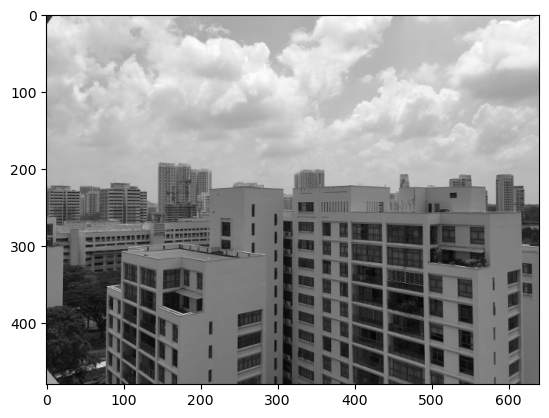

In [26]:
path2 = 'im01.jpg'
img =cv2.imread(path2,cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,plt.cm.gray)

<function matplotlib.pyplot.show(close=None, block=None)>

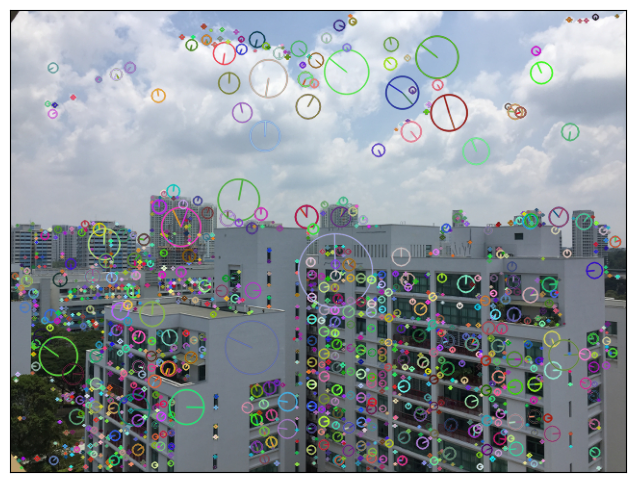

In [29]:
sift = cv2.SIFT_create()
kp,des = sift.detectAndCompute(gray,None)
cv2.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(8,6))
plt.imshow(img[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.show